<a href="https://colab.research.google.com/github/Ireneyou33/Model-Comparison-and-Forecasting-on-COVID-19/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df_conf=pd.read_csv("/content/drive/My Drive/ST494/project/Confirmed.csv")
df_death=pd.read_csv("/content/drive/My Drive/ST494/project/Deaths.csv")
df_recover=pd.read_csv("/content/drive/My Drive/ST494/project/Recovered.csv")

In [ ]:
date=df_conf.columns[4:]
for i in range(len(date)):
  date.values[i]=pd.to_datetime(date.values[i], format="%m/%d/%y")
len(date)

159

In [ ]:
# 80% training, 20% testing
split_idx=round(len(date)*0.8)
split_idx

127

In [ ]:
 def train_test(data, split_index=split_idx):
  trainset=data.iloc[:, :split_index]
  testset=data.iloc[:, split_index:]
  return trainset, testset

## ARIMA

### World Class

In [ ]:
!pip install pyramid-arima
from pyramid.arima import auto_arima

     |████████████████████████████████| 604kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [ ]:
df_worldclass=worldclass_dataframe(df_conf)
df_worldclass

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
0,555,654,941,1434,2118,2927,5578,6166,8234,9927,12038,16787,19881,23892,27635,30794,34391,37120,40150,42762,44802,45221,60368,66885,69030,71224,73258,75136,75639,76197,76819,78572,78958,79525,80372,81346,82704,84070,85967,88325,...,5005761,5112366,5220585,5321022,5417354,5504324,5599216,5702113,5820253,5941938,6070884,6178860,6275246,6387981,6515768,6642985,6776258,6902782,7015871,7119487,7243018,7376659,7515050,7644586,7779207,7912752,8034787,8174568,8350578,8489604,8670951,8829814,8961235,9099271,9264657,9432072,9610551,9802294,9980257,10145791


In [ ]:
trainset,testset=train_test(df_worldclass)

In [ ]:
data=df_worldclass.T

In [ ]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=59, max_q=59,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=3887.996, BIC=3894.122, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=3362.917, BIC=3372.104, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 1); AIC=3719.657, BIC=3728.845, Fit time=0.029 seconds
Fit ARIMA: order=(2, 1, 0); AIC=3360.184, BIC=3372.434, Fit time=0.044 seconds
Fit ARIMA: order=(2, 1, 1); AIC=3353.704, BIC=3369.017, Fit time=0.188 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 1); AIC=3364.154, BIC=3382.529, Fit time=1.214 seconds
Fit ARIMA: order=(2, 1, 2); AIC=3364.469, BIC=3382.845, Fit time=0.686 seconds
Total fit time: 2.268 seconds
3353.703927069954


In [ ]:
fit_data=trainset.T
# fit_data = fit_data.dropna(inplace=True)
stepwise_model.fit(fit_data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  126
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1284.013
Method:                       css-mle   S.D. of innovations           6345.958
Date:                Sat, 15 Aug 2020   AIC                           2578.026
Time:                        18:31:52   BIC                           2592.208
Sample:                             1   HQIC                          2583.788
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.525e+04   4.15e+04      1.091      0.277    -3.6e+04    1.27e+05
ar.L1.D.y      1.4352      0.175      8.222      0.000       1.093       1.777
ar.L2.D.y     -0.4378      0.174     -2.521      0.013      -0.778      -0.097
ma.L1.D.y     -0.6101      0.142     -4.285      0.000      -0.889      -0.331
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0045           +0.0000j            1.0045            0.0000
AR.2            2.2740           +0.0000j            2.2740            0.0000
MA.1            1.6391           +0.0000j            1.6391            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
future_forecast = stepwise_model.predict(n_periods=len(date) - split_idx)
df_origin=pd.DataFrame(testset, columns=date[split_idx:])

In [ ]:
df_predict=pd.DataFrame(np.array([future_forecast]),columns=date[split_idx:])
df_predict

,2020-05-28 00:00:00,2020-05-29 00:00:00,2020-05-30 00:00:00,2020-05-31 00:00:00,2020-06-01 00:00:00,2020-06-02 00:00:00,2020-06-03 00:00:00,2020-06-04 00:00:00,2020-06-05 00:00:00,2020-06-06 00:00:00,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00,2020-06-17 00:00:00,2020-06-18 00:00:00,2020-06-19 00:00:00,2020-06-20 00:00:00,2020-06-21 00:00:00,2020-06-22 00:00:00,2020-06-23 00:00:00,2020-06-24 00:00:00,2020-06-25 00:00:00,2020-06-26 00:00:00,2020-06-27 00:00:00,2020-06-28 00:00:00
0,5.803271e+06,5.903527e+06,6.003250e+06,6.102601e+06,6.201653e+06,6.300438e+06,6.398972e+06,6.497260e+06,6.595308e+06,6.693117e+06,6.790689e+06,6.888025e+06,6.985126e+06,7.081993e+06,7.178628e+06,7.275032e+06,7.371205e+06,7.467148e+06,7.562864e+06,7.658351e+06,7.753613e+06,7.848649e+06,7.943461e+06,8.038050e+06,8.132416e+06,8.226561e+06,8.320486e+06,8.414192e+06,8.507679e+06,8.600949e+06,8.694003e+06,8.786841e+06


In [ ]:
arima_residuals = np.array(df_predict) - np.array(df_origin)
arima_rmse = np.sqrt(np.sum(np.power(arima_residuals,2)) / len(arima_residuals))
print('RMSE = %.2f' % arima_rmse)

RMSE = 3599802.19


In [ ]:
frames=[df_origin,df_predict]
df = pd.concat(frames, ignore_index=True)
df=df.rename(index={0:"Original",1:"Predict"})
df

,2020-05-28 00:00:00,2020-05-29 00:00:00,2020-05-30 00:00:00,2020-05-31 00:00:00,2020-06-01 00:00:00,2020-06-02 00:00:00,2020-06-03 00:00:00,2020-06-04 00:00:00,2020-06-05 00:00:00,2020-06-06 00:00:00,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00,2020-06-17 00:00:00,2020-06-18 00:00:00,2020-06-19 00:00:00,2020-06-20 00:00:00,2020-06-21 00:00:00,2020-06-22 00:00:00,2020-06-23 00:00:00,2020-06-24 00:00:00,2020-06-25 00:00:00,2020-06-26 00:00:00,2020-06-27 00:00:00,2020-06-28 00:00:00
Original,5.820253e+06,5.941938e+06,6.070884e+06,6.178860e+06,6.275246e+06,6.387981e+06,6.515768e+06,6.642985e+06,6.776258e+06,6.902782e+06,7.015871e+06,7.119487e+06,7.243018e+06,7.376659e+06,7.515050e+06,7.644586e+06,7.779207e+06,7.912752e+06,8.034787e+06,8.174568e+06,8.350578e+06,8.489604e+06,8.670951e+06,8.829814e+06,8.961235e+06,9.099271e+06,9.264657e+06,9.432072e+06,9.610551e+06,9.802294e+06,9.980257e+06,1.014579e+07
Predict,5.803271e+06,5.903527e+06,6.003250e+06,6.102601e+06,6.201653e+06,6.300438e+06,6.398972e+06,6.497260e+06,6.595308e+06,6.693117e+06,6.790689e+06,6.888025e+06,6.985126e+06,7.081993e+06,7.178628e+06,7.275032e+06,7.371205e+06,7.467148e+06,7.562864e+06,7.658351e+06,7.753613e+06,7.848649e+06,7.943461e+06,8.038050e+06,8.132416e+06,8.226561e+06,8.320486e+06,8.414192e+06,8.507679e+06,8.600949e+06,8.694003e+06,8.786841e+06


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


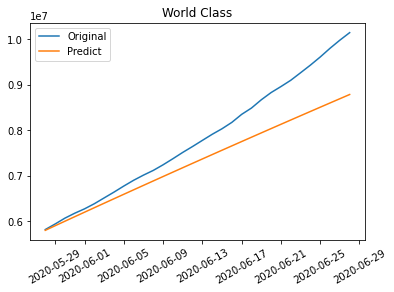

In [ ]:
plt.plot(df.loc["Original"])
plt.plot(df.loc["Predict"])
plt.xticks(rotation=30)
plt.legend('Upper Left', labels=["Original","Predict"])
plt.title("World Class")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


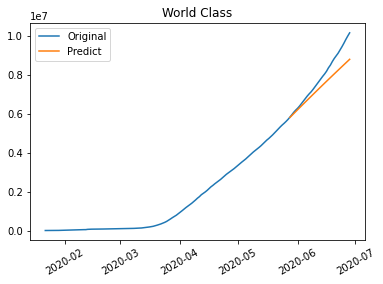

In [ ]:
plt.plot(df_worldclass.iloc[0])
plt.plot(df.loc["Predict"])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original","Predict"])
plt.title("World Class")
plt.show()

### China

In [ ]:
arr, date=sum_regioncase(df_conf, "China")
df_china=convert_dataframe(arr,date)

In [ ]:
df_china

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
0,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,...,84063,84063,84081,84084,84095,84102,84103,84106,84106,84123,84128,84146,84154,84161,84160,84171,84177,84186,84191,84195,84198,84209,84216,84228,84286,84335,84378,84422,84458,84494,84494,84553,84572,84624,84653,84673,84701,84725,84743,84757


In [ ]:
trainset,testset=train_test(df_china)
data=df_china.T

In [ ]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=60, max_q=60,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=2704.112, BIC=2716.362, Fit time=0.073 seconds
Fit ARIMA: order=(0, 1, 0); AIC=2772.716, BIC=2778.841, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2719.519, BIC=2728.707, Fit time=0.039 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2736.753, BIC=2745.941, Fit time=0.026 seconds
Fit ARIMA: order=(2, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2); AIC=2705.699, BIC=2724.074, Fit time=0.299 seconds
Total fit time: 0.480 seconds
2704.1115656327747


In [ ]:
stepwise_model.fit(trainset.T)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  126
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1089.253
Method:                       css-mle   S.D. of innovations           1371.133
Date:                Sat, 15 Aug 2020   AIC                           2186.506
Time:                        18:48:08   BIC                           2197.851
Sample:                             1   HQIC                          2191.115
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        605.2510    525.488      1.152      0.252    -424.686    1635.188
ar.L1.D.y      0.9278      0.046     20.331      0.000       0.838       1.017
ma.L1.D.y     -0.6642      0.098     -6.807      0.000      -0.855      -0.473
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0778           +0.0000j            1.0778            0.0000
MA.1            1.5056           +0.0000j            1.5056            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
future_forecast = stepwise_model.predict(n_periods=len(date)-split_idx)
df_origin=pd.DataFrame(testset, columns=date[split_idx:])

In [ ]:
df_predict=pd.DataFrame(np.array([future_forecast]),columns=date[-len(future_forecast):])

In [ ]:
frames=[df_origin,df_predict]
df = pd.concat(frames, ignore_index=True)
df=df.rename(index={0:"Original",1:"Predict"})
df

,2020-05-28 00:00:00,2020-05-29 00:00:00,2020-05-30 00:00:00,2020-05-31 00:00:00,2020-06-01 00:00:00,2020-06-02 00:00:00,2020-06-03 00:00:00,2020-06-04 00:00:00,2020-06-05 00:00:00,2020-06-06 00:00:00,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00,2020-06-17 00:00:00,2020-06-18 00:00:00,2020-06-19 00:00:00,2020-06-20 00:00:00,2020-06-21 00:00:00,2020-06-22 00:00:00,2020-06-23 00:00:00,2020-06-24 00:00:00,2020-06-25 00:00:00,2020-06-26 00:00:00,2020-06-27 00:00:00,2020-06-28 00:00:00
Original,84106.000000,84123.000000,84128.000000,84146.000000,84154.000000,84161.000000,84160.000000,84171.000000,84177.000000,84186.000000,84191.000000,84195.000000,84198.000000,84209.00000,84216.00000,84228.00000,84286.000000,84335.000000,84378.000000,84422.00000,84458.000000,84494.000000,84494.000000,84553.000000,84572.000000,84624.000000,84653.000000,84673.000000,84701.000000,84725.000000,84743.000000,84757.000000
Predict,84239.678943,84407.404131,84606.717517,84835.338517,85091.151199,85372.192395,85676.640675,86002.806109,86349.120776,86714.129956,87096.483954,87494.930521,87908.307816,88335.53788,88775.62058,89227.62799,89690.699178,90164.035369,90646.895456,91138.59184,91638.486563,92145.987727,92660.546168,93181.652368,93708.833598,94241.651256,94779.698406,95322.597494,95869.998223,96421.575586,96977.028041,97536.075817


In [ ]:
arima_residuals = np.array(df_predict) - np.array(df_origin)
arima_rmse = np.sqrt(np.sum(np.power(arima_residuals,2)) / len(arima_residuals))
print('RMSE = %.2f' % arima_rmse)

RMSE = 38485.87


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


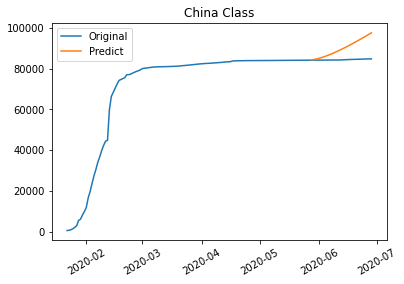

In [ ]:
plt.plot(df_china.iloc[0])
plt.plot(df.loc["Predict"])
plt.xticks(rotation=30)
plt.legend('Upper Left', labels=["Original","Predict"])
plt.title("China Class")
plt.show()

### Outside China

In [ ]:
df_restworld=df_conf[df_conf["Country/Region"]!="China"].iloc[:,4:]
df_restworld=convert_dataframe(arr,date)

In [ ]:
trainset,testset=train_test(df_restworld)
data=df_restworld.T

In [ ]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=60, max_q=60,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=2704.112, BIC=2716.362, Fit time=0.062 seconds
Fit ARIMA: order=(0, 1, 0); AIC=2772.716, BIC=2778.841, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2719.519, BIC=2728.707, Fit time=0.036 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2736.753, BIC=2745.941, Fit time=0.023 seconds
Fit ARIMA: order=(2, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2); AIC=2705.699, BIC=2724.074, Fit time=0.274 seconds
Total fit time: 0.434 seconds
2704.1115656327747


In [ ]:
stepwise_model.fit(trainset.T)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  126
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1089.253
Method:                       css-mle   S.D. of innovations           1371.133
Date:                Sat, 15 Aug 2020   AIC                           2186.506
Time:                        18:48:46   BIC                           2197.851
Sample:                             1   HQIC                          2191.115
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        605.2510    525.488      1.152      0.252    -424.686    1635.188
ar.L1.D.y      0.9278      0.046     20.331      0.000       0.838       1.017
ma.L1.D.y     -0.6642      0.098     -6.807      0.000      -0.855      -0.473
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0778           +0.0000j            1.0778            0.0000
MA.1            1.5056           +0.0000j            1.5056            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
future_forecast = stepwise_model.predict(n_periods=len(date)-split_idx)
df_origin=pd.DataFrame(testset, columns=date[split_idx:])
df_predict=pd.DataFrame(np.array([future_forecast]),columns=date[-len(future_forecast):])

In [ ]:
frames=[df_origin,df_predict]
df = pd.concat(frames, ignore_index=True)
df=df.rename(index={0:"Original",1:"Predict"})

In [ ]:
arima_residuals = np.array(df_predict) - np.array(df_origin)
arima_rmse = np.sqrt(np.sum(np.power(arima_residuals,2)) / len(arima_residuals))
print('RMSE = %.2f' % arima_rmse)

RMSE = 38485.87


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


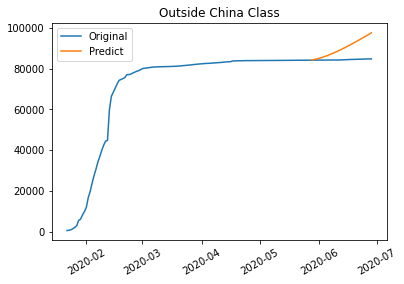

In [ ]:
plt.plot(df_restworld.iloc[0])
plt.plot(df.loc["Predict"])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original","Predict"])
plt.title("Outside China Class")
plt.show()

### Italy

In [ ]:
df_italy=df_conf[df_conf["Country/Region"]=="Italy"].iloc[:,4:]

In [ ]:
trainset,testset=train_test(df_italy)
data=df_italy.T

In [ ]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=2338.292, BIC=2350.542, Fit time=0.118 seconds
Fit ARIMA: order=(0, 1, 0); AIC=2818.281, BIC=2824.406, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2336.335, BIC=2345.523, Fit time=0.080 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2648.861, BIC=2658.049, Fit time=0.052 seconds
Fit ARIMA: order=(2, 1, 0); AIC=2338.296, BIC=2350.547, Fit time=0.135 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2339.630, BIC=2354.943, Fit time=0.155 seconds
Total fit time: 0.545 seconds
2336.334993666011


In [ ]:
stepwise_model.fit(trainset.T)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  126
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -940.592
Method:                       css-mle   S.D. of innovations            417.594
Date:                Sat, 15 Aug 2020   AIC                           1887.183
Time:                        18:49:06   BIC                           1895.692
Sample:                             1   HQIC                          1890.640
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1280.1901   1107.487      1.156      0.250    -890.444    3450.824
ar.L1.D.y      0.9725      0.018     55.422      0.000       0.938       1.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0283           +0.0000j            1.0283            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
future_forecast = stepwise_model.predict(n_periods=len(date)-split_idx)
df_origin=pd.DataFrame(testset, columns=date[split_idx:])
df_predict=pd.DataFrame(np.array([future_forecast]),columns=date[-len(future_forecast):])

In [ ]:
frames=[df_origin,df_predict]
df = pd.concat(frames, ignore_index=True)
df=df.rename(index={0:"Original",1:"Predict"})

In [ ]:
arima_residuals = np.array(df_predict) - np.array(df_origin)
arima_rmse = np.sqrt(np.sum(np.power(arima_residuals,2)) / len(arima_residuals))
print('RMSE = %.2f' % arima_rmse)

RMSE = 51176.20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


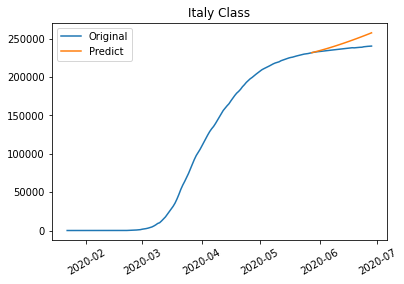

In [ ]:
plt.plot(df_italy.iloc[0])
plt.plot(df.loc["Predict"])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original","Predict"])
plt.title("Italy Class")
plt.show()

### Canada

In [ ]:
arr, date=sum_regioncase(df_conf, "Canada")

In [ ]:
df_canada=convert_dataframe(arr,date)
trainset,testset=train_test(df_canada)
data=df_canada.T

In [ ]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=60, max_q=60,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=2219.486, BIC=2231.736, Fit time=0.145 seconds
Fit ARIMA: order=(0, 1, 0); AIC=2505.767, BIC=2511.892, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2289.247, BIC=2298.435, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2415.980, BIC=2425.168, Fit time=0.044 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2213.973, BIC=2229.286, Fit time=0.157 seconds
Fit ARIMA: order=(2, 1, 0); AIC=2238.160, BIC=2250.410, Fit time=0.106 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2208.798, BIC=2227.173, Fit time=0.278 seconds
Fit ARIMA: order=(3, 1, 3); AIC=2211.202, BIC=2235.702, Fit time=0.529 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2210.518, BIC=2225.831, Fit time=0.238 seconds
Fit ARIMA: order=(3, 1, 2); AIC=2210.564, BIC=2232.002, Fit time=0.329 seconds
Fit ARIMA: order=(2, 1, 3); AIC=2210.635, BIC=2232.073, Fit time=0.421 seconds
Total fit time: 2.306 seconds
2208.797921334141


In [ ]:
stepwise_model.fit(trainset.T)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  126
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -889.108
Method:                       css-mle   S.D. of innovations            277.756
Date:                Sat, 15 Aug 2020   AIC                           1790.215
Time:                        18:49:28   BIC                           1807.233
Sample:                             1   HQIC                          1797.129
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        591.0261    449.665      1.314      0.191    -290.300    1472.352
ar.L1.D.y      1.3683      0.178      7.685      0.000       1.019       1.717
ar.L2.D.y     -0.3794      0.177     -2.140      0.034      -0.727      -0.032
ma.L1.D.y     -1.2880      0.152     -8.494      0.000      -1.585      -0.991
ma.L2.D.y      0.5612      0.129      4.359      0.000       0.309       0.814
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0184           +0.0000j            1.0184            0.0000
AR.2            2.5884           +0.0000j            2.5884            0.0000
MA.1            1.1475           -0.6819j            1.3349           -0.0853
MA.2            1.1475           +0.6819j            1.3349            0.0853
-----------------------------------------------------------------------------
"""

In [ ]:
future_forecast = stepwise_model.predict(n_periods=len(date)-split_idx)
df_origin=pd.DataFrame(testset, columns=date[split_idx:])
df_predict=pd.DataFrame(np.array([future_forecast]),columns=date[-len(future_forecast):])

In [ ]:
frames=[df_origin,df_predict]
df = pd.concat(frames, ignore_index=True)
df=df.rename(index={0:"Original",1:"Predict"})

In [ ]:
arima_residuals = np.array(df_predict) - np.array(df_origin)
arima_rmse = np.sqrt(np.sum(np.power(arima_residuals,2)) / len(arima_residuals))
print('RMSE = %.2f' % arima_rmse)

RMSE = 30290.35


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


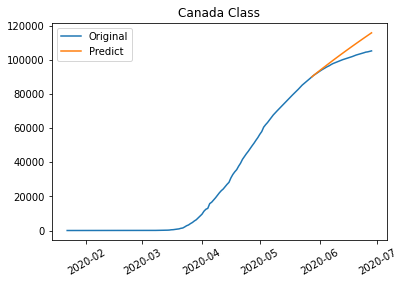

In [ ]:
plt.plot(df_canada.iloc[0])
plt.plot(df.loc["Predict"])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original","Predict"])
plt.title("Canada Class")
plt.show()